## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Augmentation Ablation

In [2]:
df = pd.read_excel('augmentation.xlsx')

In [3]:
df.head(50)

,training,validation,augment,0_top_1,0_top_5,1_top_1,1_top_5,2_top_1,2_top_5,mean_top_1,mean_top_5
0,Train,Test,Baseline,13.91,39.35,16.86,37.28,14.50,43.20,15.090000,39.943333
1,Train,Test,Cutout,13.33,15.38,12.98,14.89,13.50,15.48,13.270000,15.250000
2,Train,Test,Flip,13.91,32.54,16.57,42.31,18.64,44.38,16.373333,39.743333
3,Train,Test,MultiscaleCrop (MS),40.53,72.19,38.46,71.89,34.91,68.05,37.966667,70.710000
4,Train,Test,,0.00,1.00,2.00,3.00,4.00,5.00,0.000000,7.000000
5,Train,Test,Cutmix,11.54,27.22,7.10,23.96,13.02,29.59,10.553333,26.923333
6,Train,Test,Mixup,9.17,25.44,11.83,27.81,7.69,23.08,9.563333,25.443333
7,Train,Test,Augmix (AM),33.73,64.20,29.88,60.36,34.32,63.91,32.643333,62.823333
8,Train,Test,,0.00,1.00,2.00,3.00,4.00,5.00,0.000000,7.000000
9,Train,Test,RandAugment,34.32,64.20,31.95,59.76,29.59,64.50,31.953333,62.820000


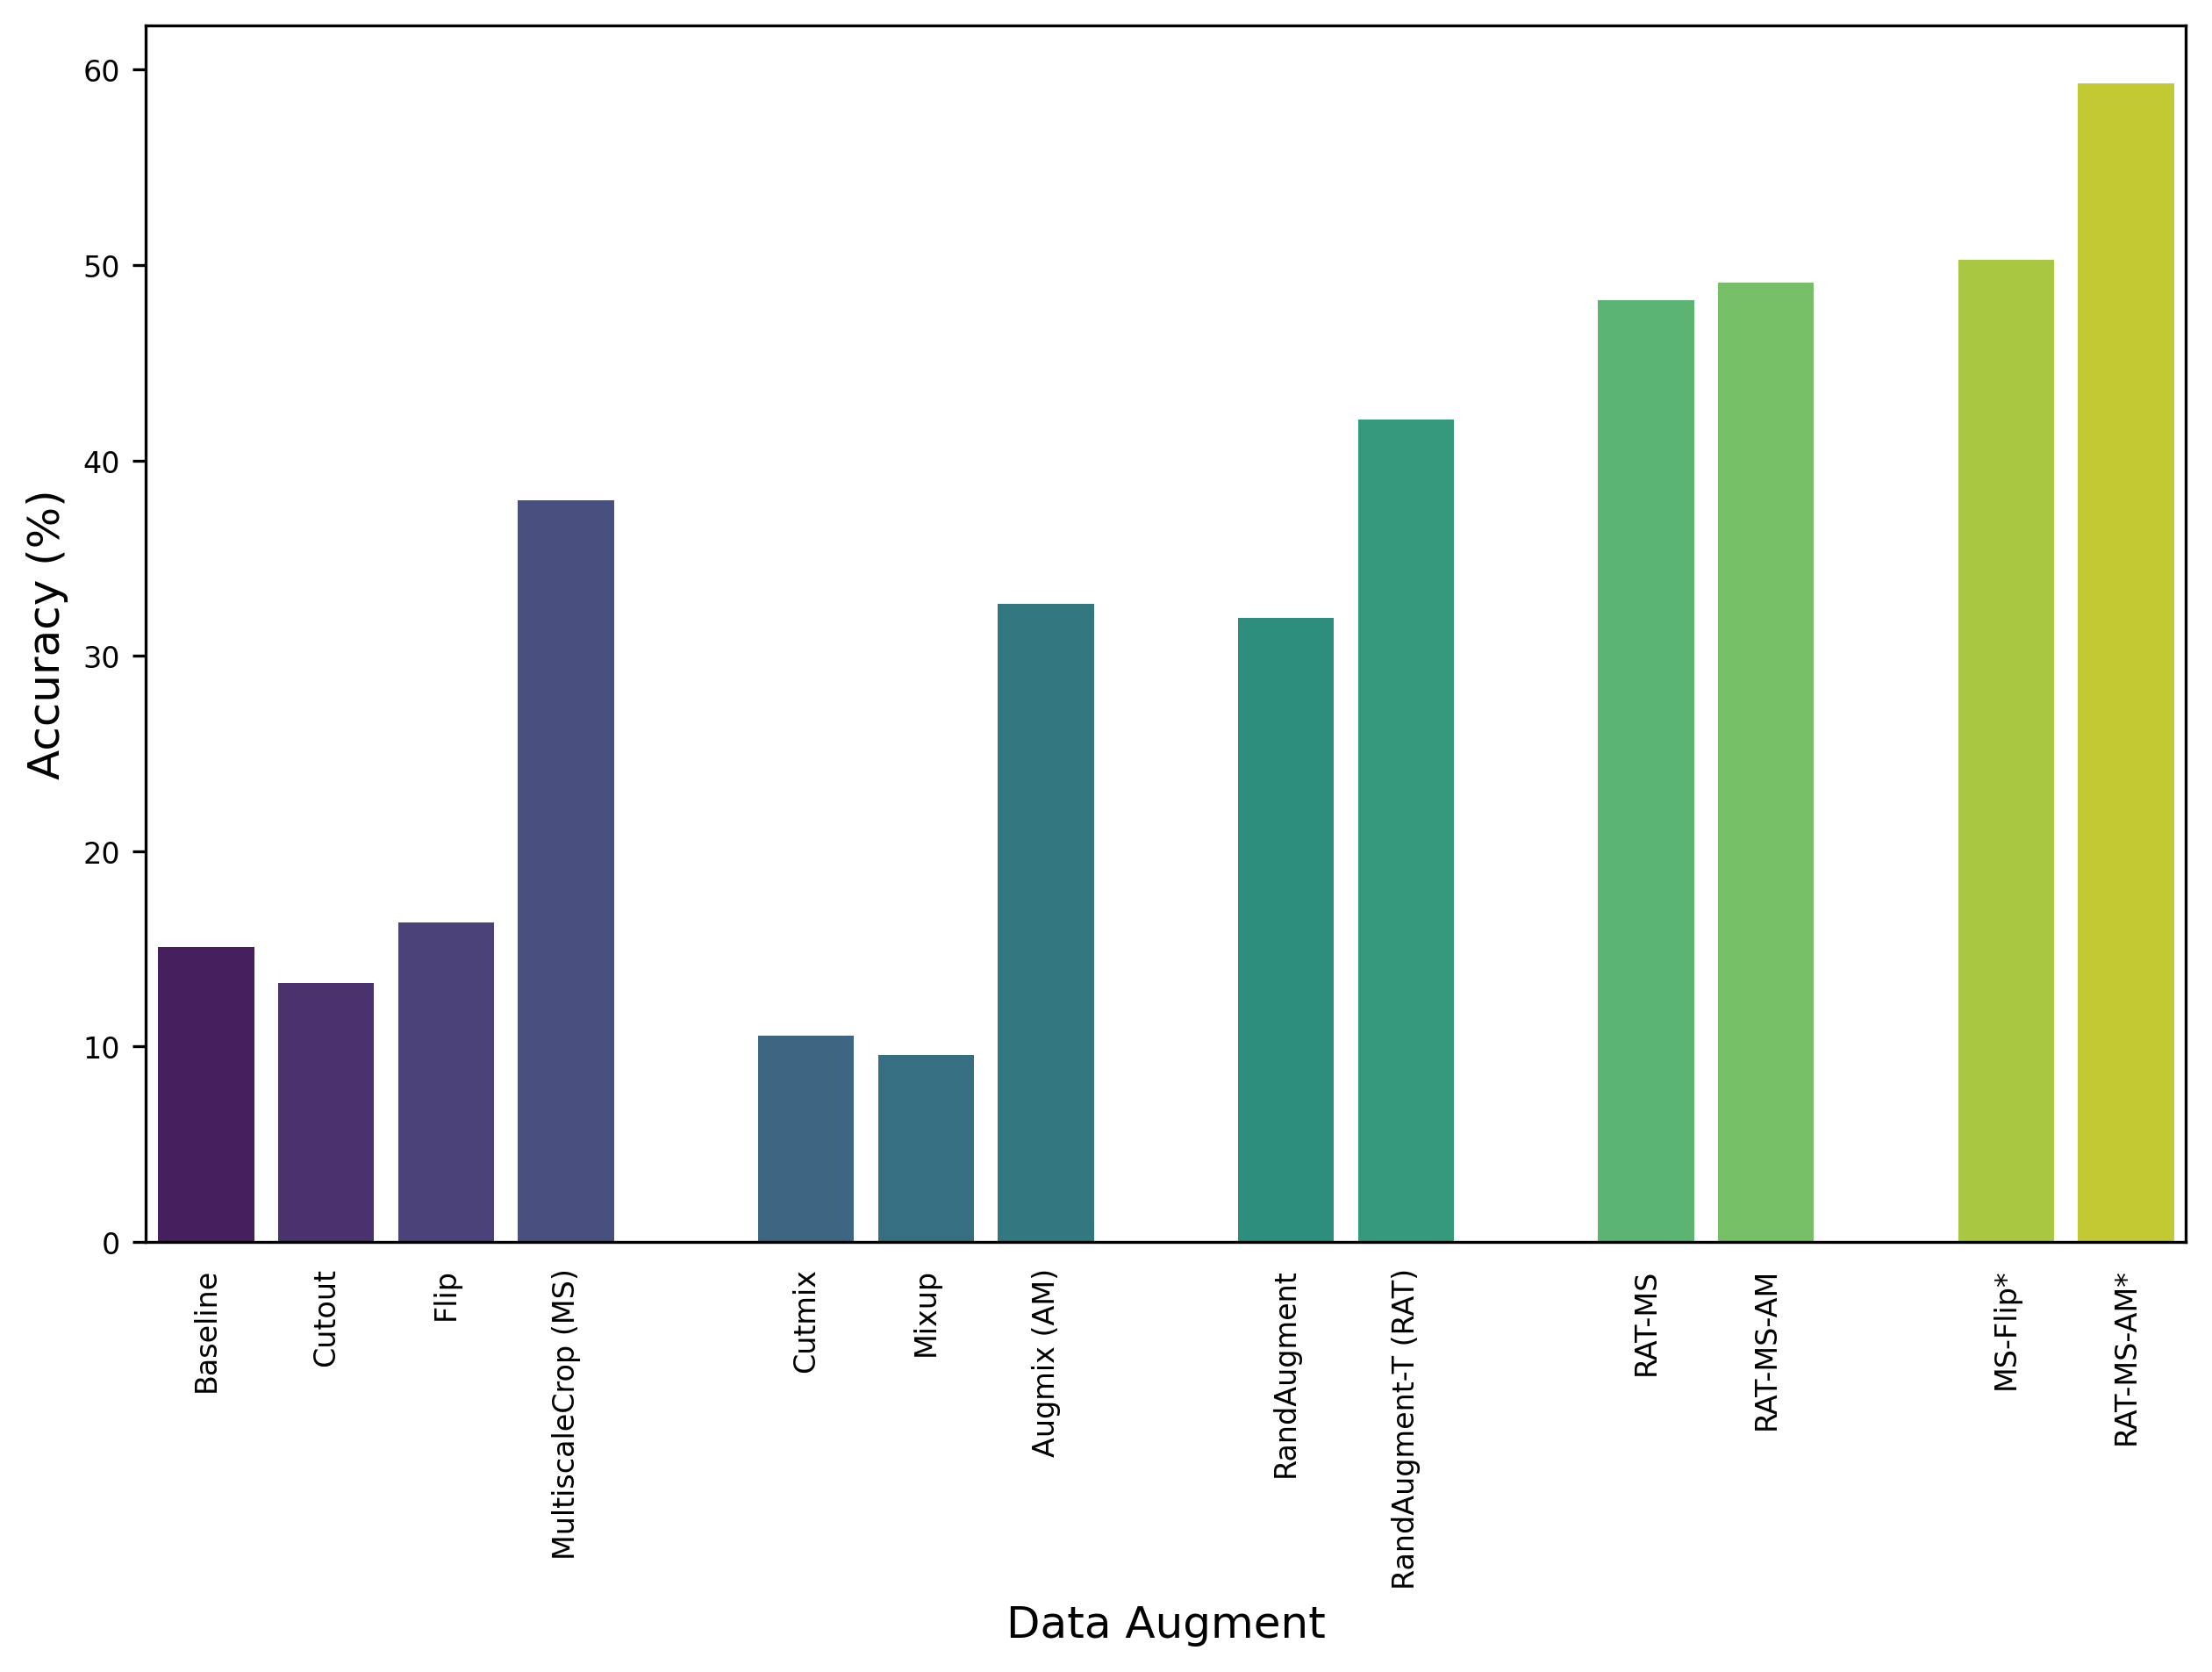

In [4]:
plt.figure(figsize=(10,6), dpi=300)
g = sns.barplot(x='augment',
            y='mean_top_1',
            data=df,
            palette='viridis'
        )
plt.xticks(rotation=90)
plt.xlabel('Data Augment', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
g.tick_params(axis='y', labelsize=8)
g.tick_params(axis='x', labelsize=8)
g.tick_params(bottom=False) 

## Model Ablation

### WLASL100

In [5]:
df = pd.read_excel('wlasl100_models.xlsx')
df.head(50)

,WLASL100,Seed-0 Top-1 Accuracy (%),Seed-0 Top-5 Accuracy (%),Seed-1 Top-1 Accuracy (%),Seed-1 Top-5 Accuracy (%),Seed-2 Top-1 Accuracy (%),Seed-3 Top-5 Accuracy (%),Mean Top-1 Accuracy,Mean Top-5 Accuracy
0,C3D,50.77,79.45,48.45,79.46,49.22,79.84,49.480000,79.583333
1,TSN,44.57,78.29,47.67,78.68,45.61,77.78,45.950000,78.250000
2,TSM,55.81,86.82,55.81,87.60,55.81,86.05,55.810000,86.823333
3,Tanet,58.91,82.95,57.36,87.21,60.08,84.11,58.783333,84.756667
4,CSN,77.91,93.02,79.84,93.02,79.84,93.02,79.196667,93.020000
5,Timesformer,62.40,84.88,61.63,84.11,61.24,84.11,61.756667,84.366667
6,R(2+1)d,23.26,12.02,29.46,68.60,30.23,66.67,27.650000,49.096667
7,I3D,60.77,60.08,60.85,60.08,57.93,57.75,59.850000,59.303333
8,TPN,67.44,88.37,62.79,90.70,58.14,88.37,62.790000,89.146667
9,TIN,56.98,85.27,53.10,82.95,37.21,72.48,49.096667,80.233333


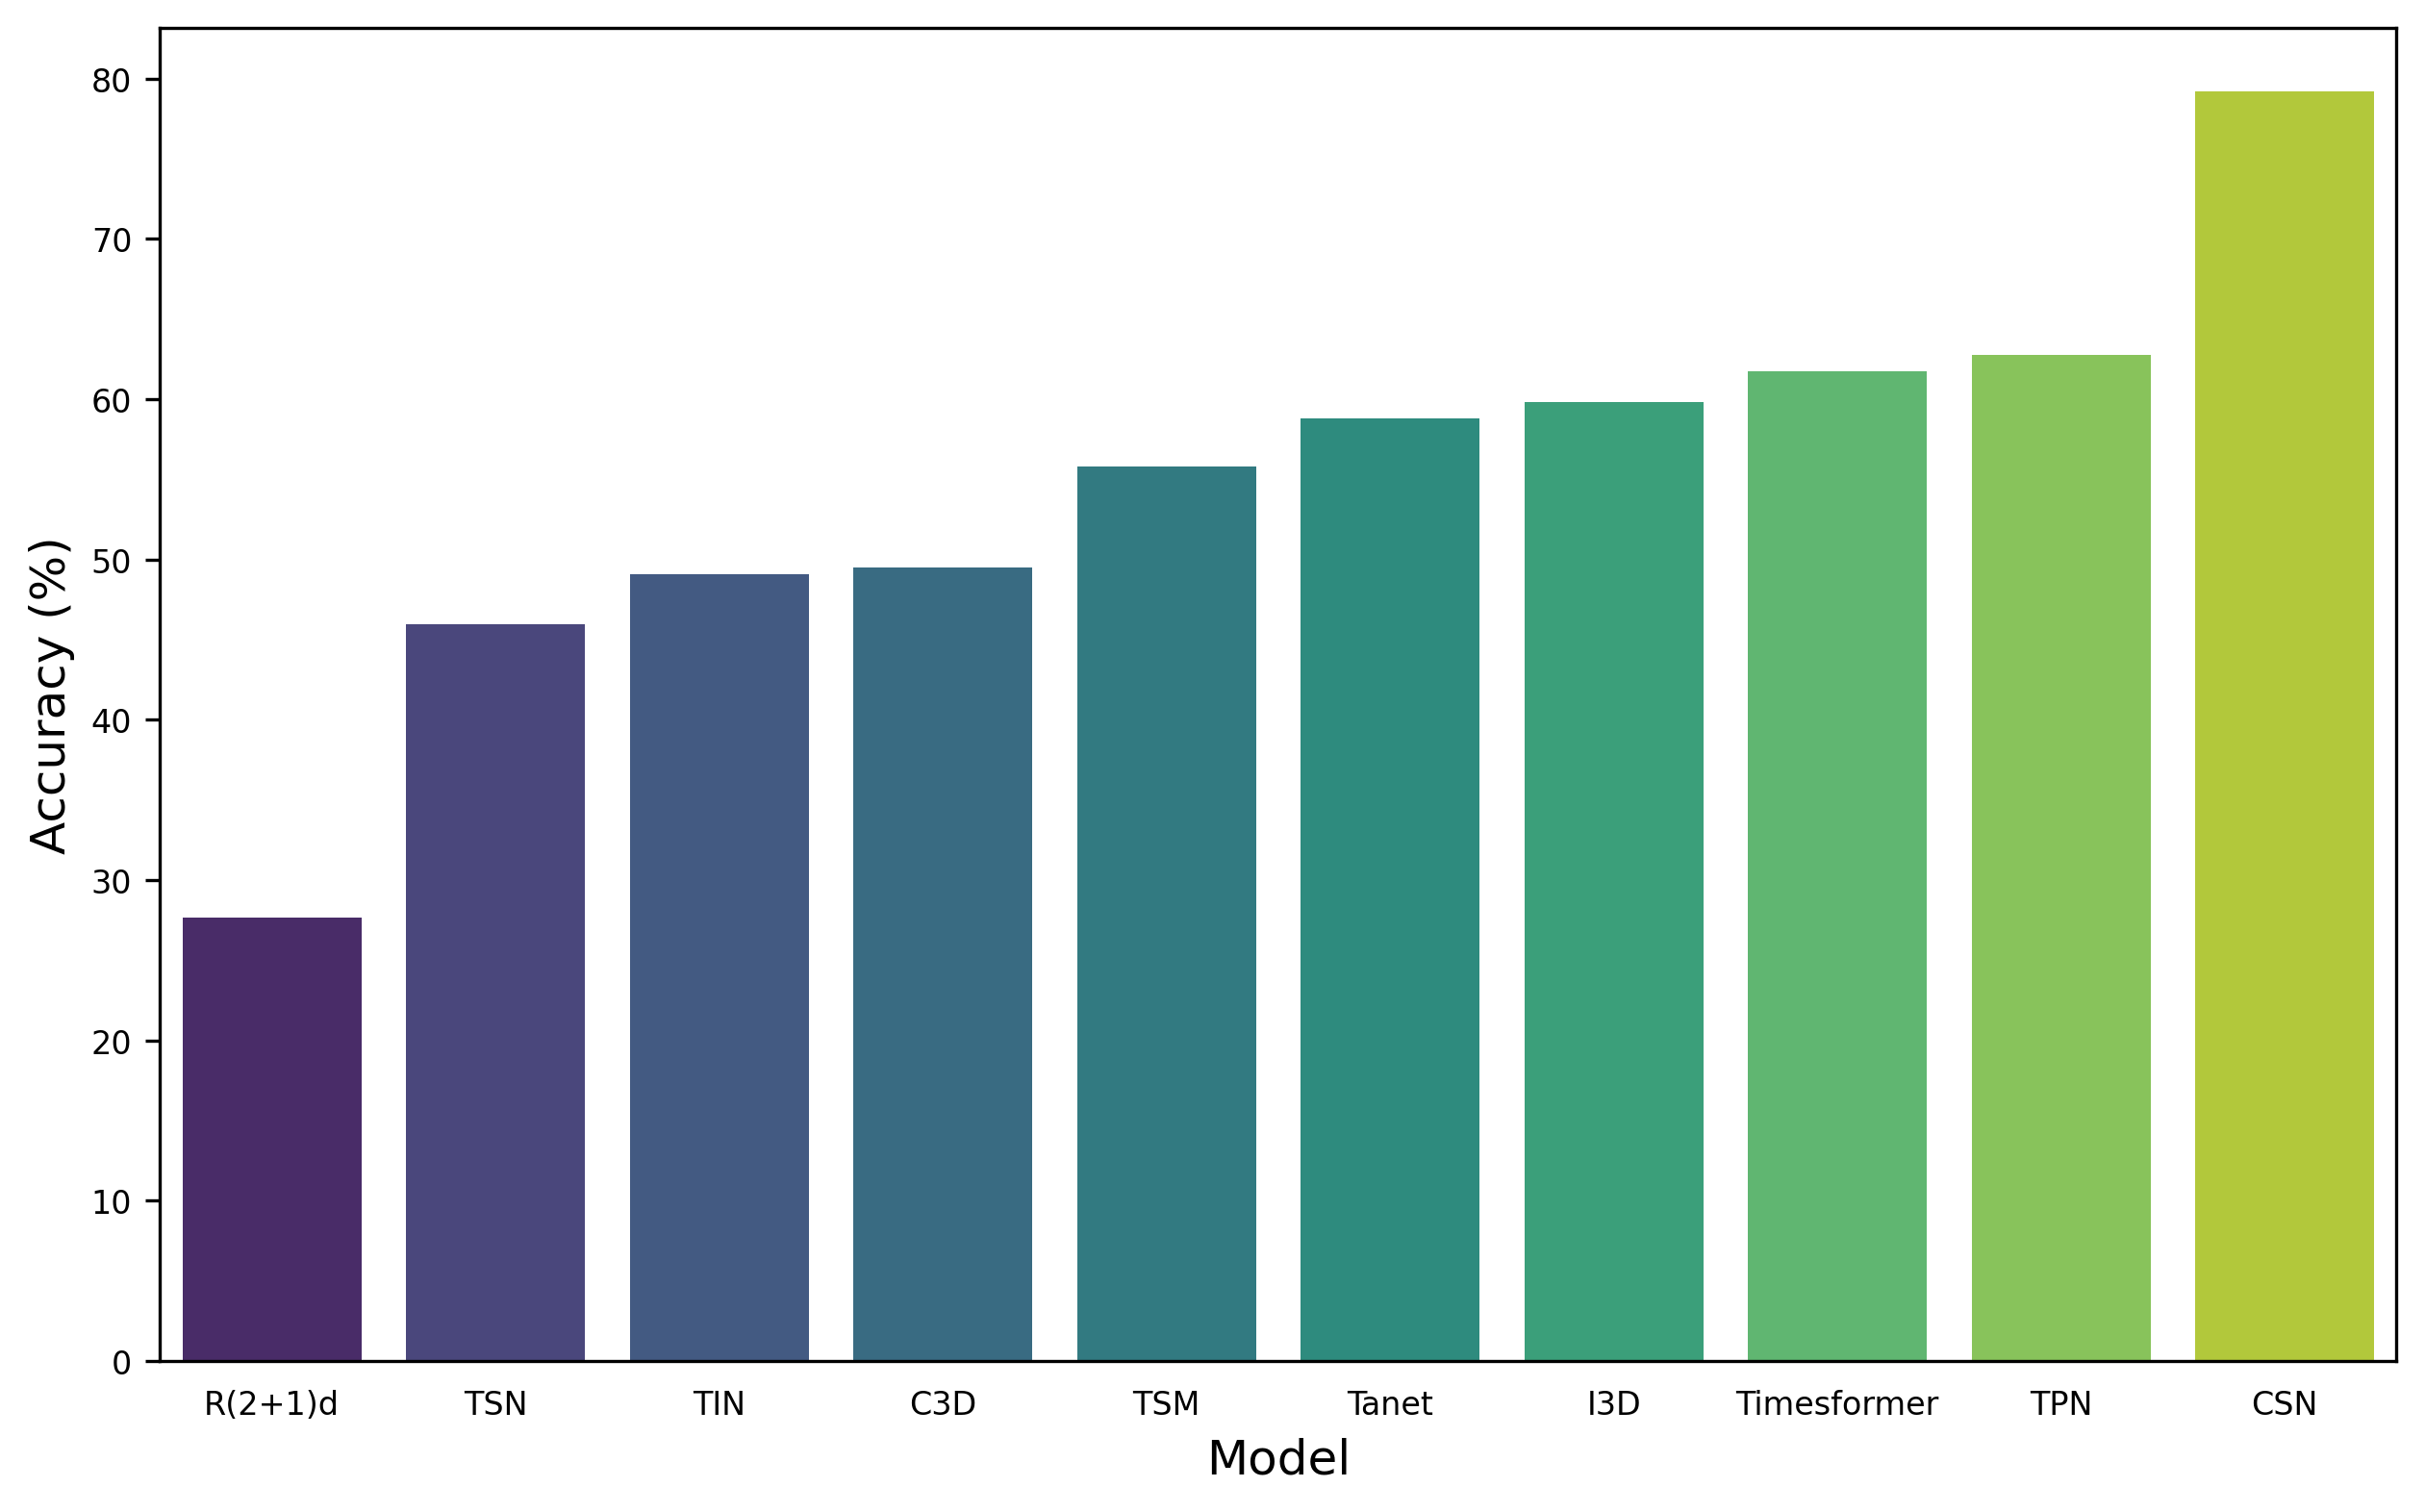

In [6]:
plt.figure(figsize=(10,6), dpi=300)
g = sns.barplot(x='WLASL100',
            y='Mean Top-1 Accuracy',
            data=df,
            palette='viridis',
            order=df.sort_values('Mean Top-1 Accuracy').WLASL100,
        )
# plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
g.tick_params(axis='y', labelsize=8)
g.tick_params(axis='x', labelsize=8)
g.tick_params(bottom=False) 

### AUTSL

In [81]:
df = pd.read_excel('autsl_models.xlsx')
df.head(50)

,AUTSL,Seed-0 Top-1 Accuracy (%),Seed-0 Top-5 Accuracy (%),Seed-1 Top-1 Accuracy (%),Seed-1 Top-5 Accuracy (%),Seed-2 Top-1 Accuracy (%),Seed-3 Top-5 Accuracy (%),Mean Top-1 Accuracy,Mean Top-5 Accuracy
0,CSN,90.25,98.72,93.32,99.36,89.01,98.72,90.860000,98.933333
1,TPN,89.82,98.93,89.23,98.34,89.54,98.56,89.530000,98.610000
2,Timesformer,76.58,93.45,70.22,90.99,72.84,92.68,73.213333,92.373333


(array([0, 1, 2]),
 [Text(0, 0, 'CSN'), Text(1, 0, 'TPN'), Text(2, 0, 'Timesformer')])

<Figure size 3000x1800 with 0 Axes>

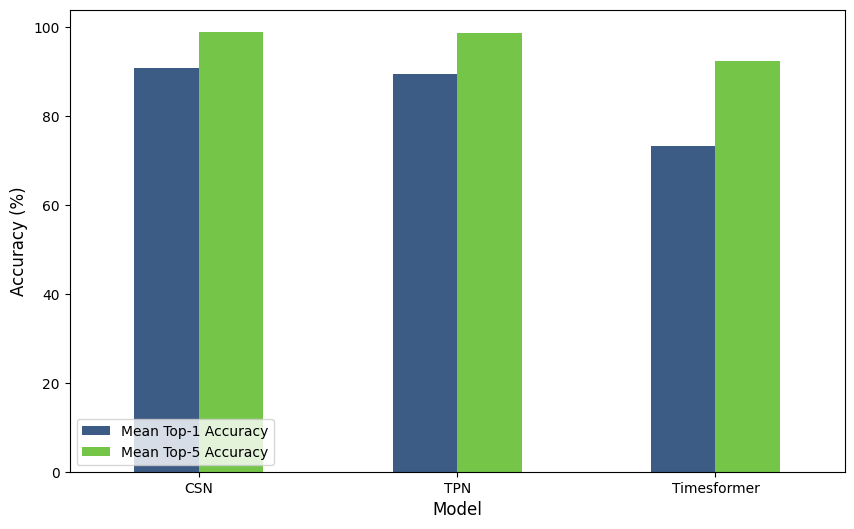

In [83]:
plt.figure(figsize=(10,6), dpi=300)
my_colors = ['#3c5b85', '#75c549']
df.plot(x='AUTSL',
        y=['Mean Top-1 Accuracy', 'Mean Top-5 Accuracy'],
#         palette='viridis',
        kind='bar',
        color=my_colors,
        figsize=(10,6),
       )
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(loc='lower left')
plt.xticks(rotation = 0)

# my_cmap = plt.get_cmap("viridis")
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# plt.bar(x, y, color=my_cmap(rescale(y)))

### WLASL2000

In [86]:
df = pd.read_excel('wlasl2000_models.xlsx')
df.head(50)

,WLASL2000,Seed-0 Top-1 Accuracy (%),Seed-0 Top-5 Accuracy (%),Seed-1 Top-1 Accuracy (%),Seed-1 Top-5 Accuracy (%),Seed-2 Top-1 Accuracy (%),Seed-3 Top-5 Accuracy (%),Mean Top-1 Accuracy,Mean Top-5 Accuracy
0,CSN,38.87,71.48,44.04,77.28,46.02,77.26,42.976667,75.340000
1,TPN,30.64,65.72,28.45,62.28,26.75,59.22,28.613333,62.406667


(array([0, 1]), [Text(0, 0, 'CSN'), Text(1, 0, 'TPN')])

<Figure size 3000x1800 with 0 Axes>

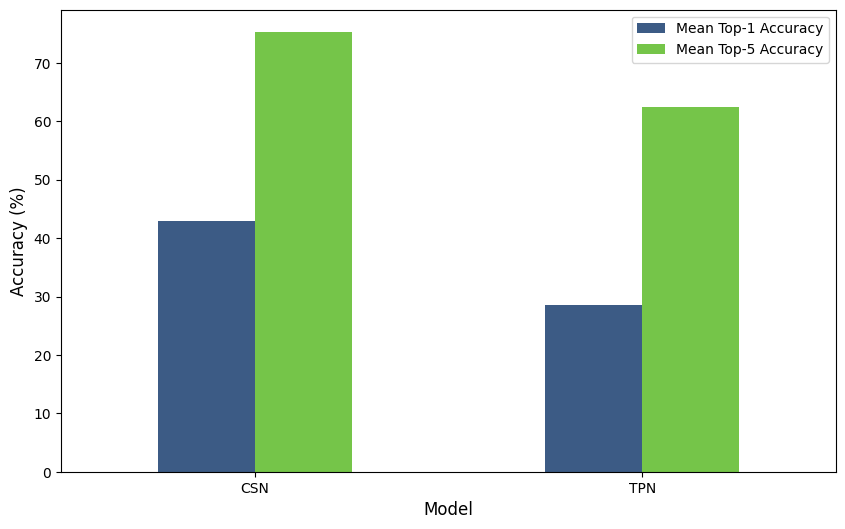

In [87]:
plt.figure(figsize=(10,6), dpi=300)

my_colors = ['#3c5b85', '#75c549']
df.plot(x='WLASL2000',
        y=['Mean Top-1 Accuracy', 'Mean Top-5 Accuracy'],
#         palette='viridis',
        kind='bar',
        color=my_colors,
        figsize=(10,6),
       )
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation = 0)

# my_cmap = plt.get_cmap("viridis")
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# plt.bar(x, y, color=my_cmap(rescale(y)))

## Samples vs Accuracy

### I3D

In [173]:
i3d = pd.read_excel('sample_ablation_i3d.xlsx')
i3d['Top-1 Accuracy'] = i3d['Top-1 Accuracy'] * 100
i3d['Top-5 Accuracy'] = i3d['Top-5 Accuracy'] * 100
i3d['model'] = 'I3D'
i3d.head(5)

,Samples per class,Top-1 Accuracy,Top-5 Accuracy,model
0,1,2.713,6.202,I3D
1,2,4.264,8.527,I3D
2,3,9.302,18.600,I3D
3,4,11.240,25.580,I3D
4,5,16.280,35.660,I3D


In [174]:
csn = pd.read_excel('sample_ablation_csn.xlsx')
csn['model'] = 'CSN'
csn.head()

,Samples per class,Top-1 Accuracy,Top-5 Accuracy,model
0,1,6.977,20.16,CSN
1,2,10.470,35.66,CSN
2,3,27.130,55.81,CSN
3,4,32.560,60.85,CSN
4,5,34.880,69.38,CSN


In [175]:
df_cd = pd.merge(csn, i3d, how='outer')
df_cd.head()

,Samples per class,Top-1 Accuracy,Top-5 Accuracy,model
0,1,6.977,20.16,CSN
1,2,10.470,35.66,CSN
2,3,27.130,55.81,CSN
3,4,32.560,60.85,CSN
4,5,34.880,69.38,CSN


In [180]:
fig, axs = plt.subplots(2, 1)
fig = (figsize=(10,6), dpi=300)
sns.lineplot(x='Samples per class', y='Top-1 Accuracy', hue='model', data=df_cd, ax=axs[0], legend=False)
axs[0].set(ylabel='Top-1 Accuracy (%)')
axs[0].set(ylim=(0, 100))
axs[0].set(xticks=range(0,16,2))
# axs[0].tick_params(bottom=False)
axs[0].set(xlabel='')

sns.lineplot(x='Samples per class', y='Top-5 Accuracy', hue='model', data=df_cd, ax=axs[1])
axs[1].set(xticks=range(0,16,2))
axs[1].set(ylabel='Top-5 Accuracy (%)')
axs[1].set(xlabel='Samples per Gloss')
axs[1].set(ylim=(0, 100))
plt.legend(title='Model', loc='lower right')

fig.tight_layout()

SyntaxError: invalid syntax (649579484.py, line 2)

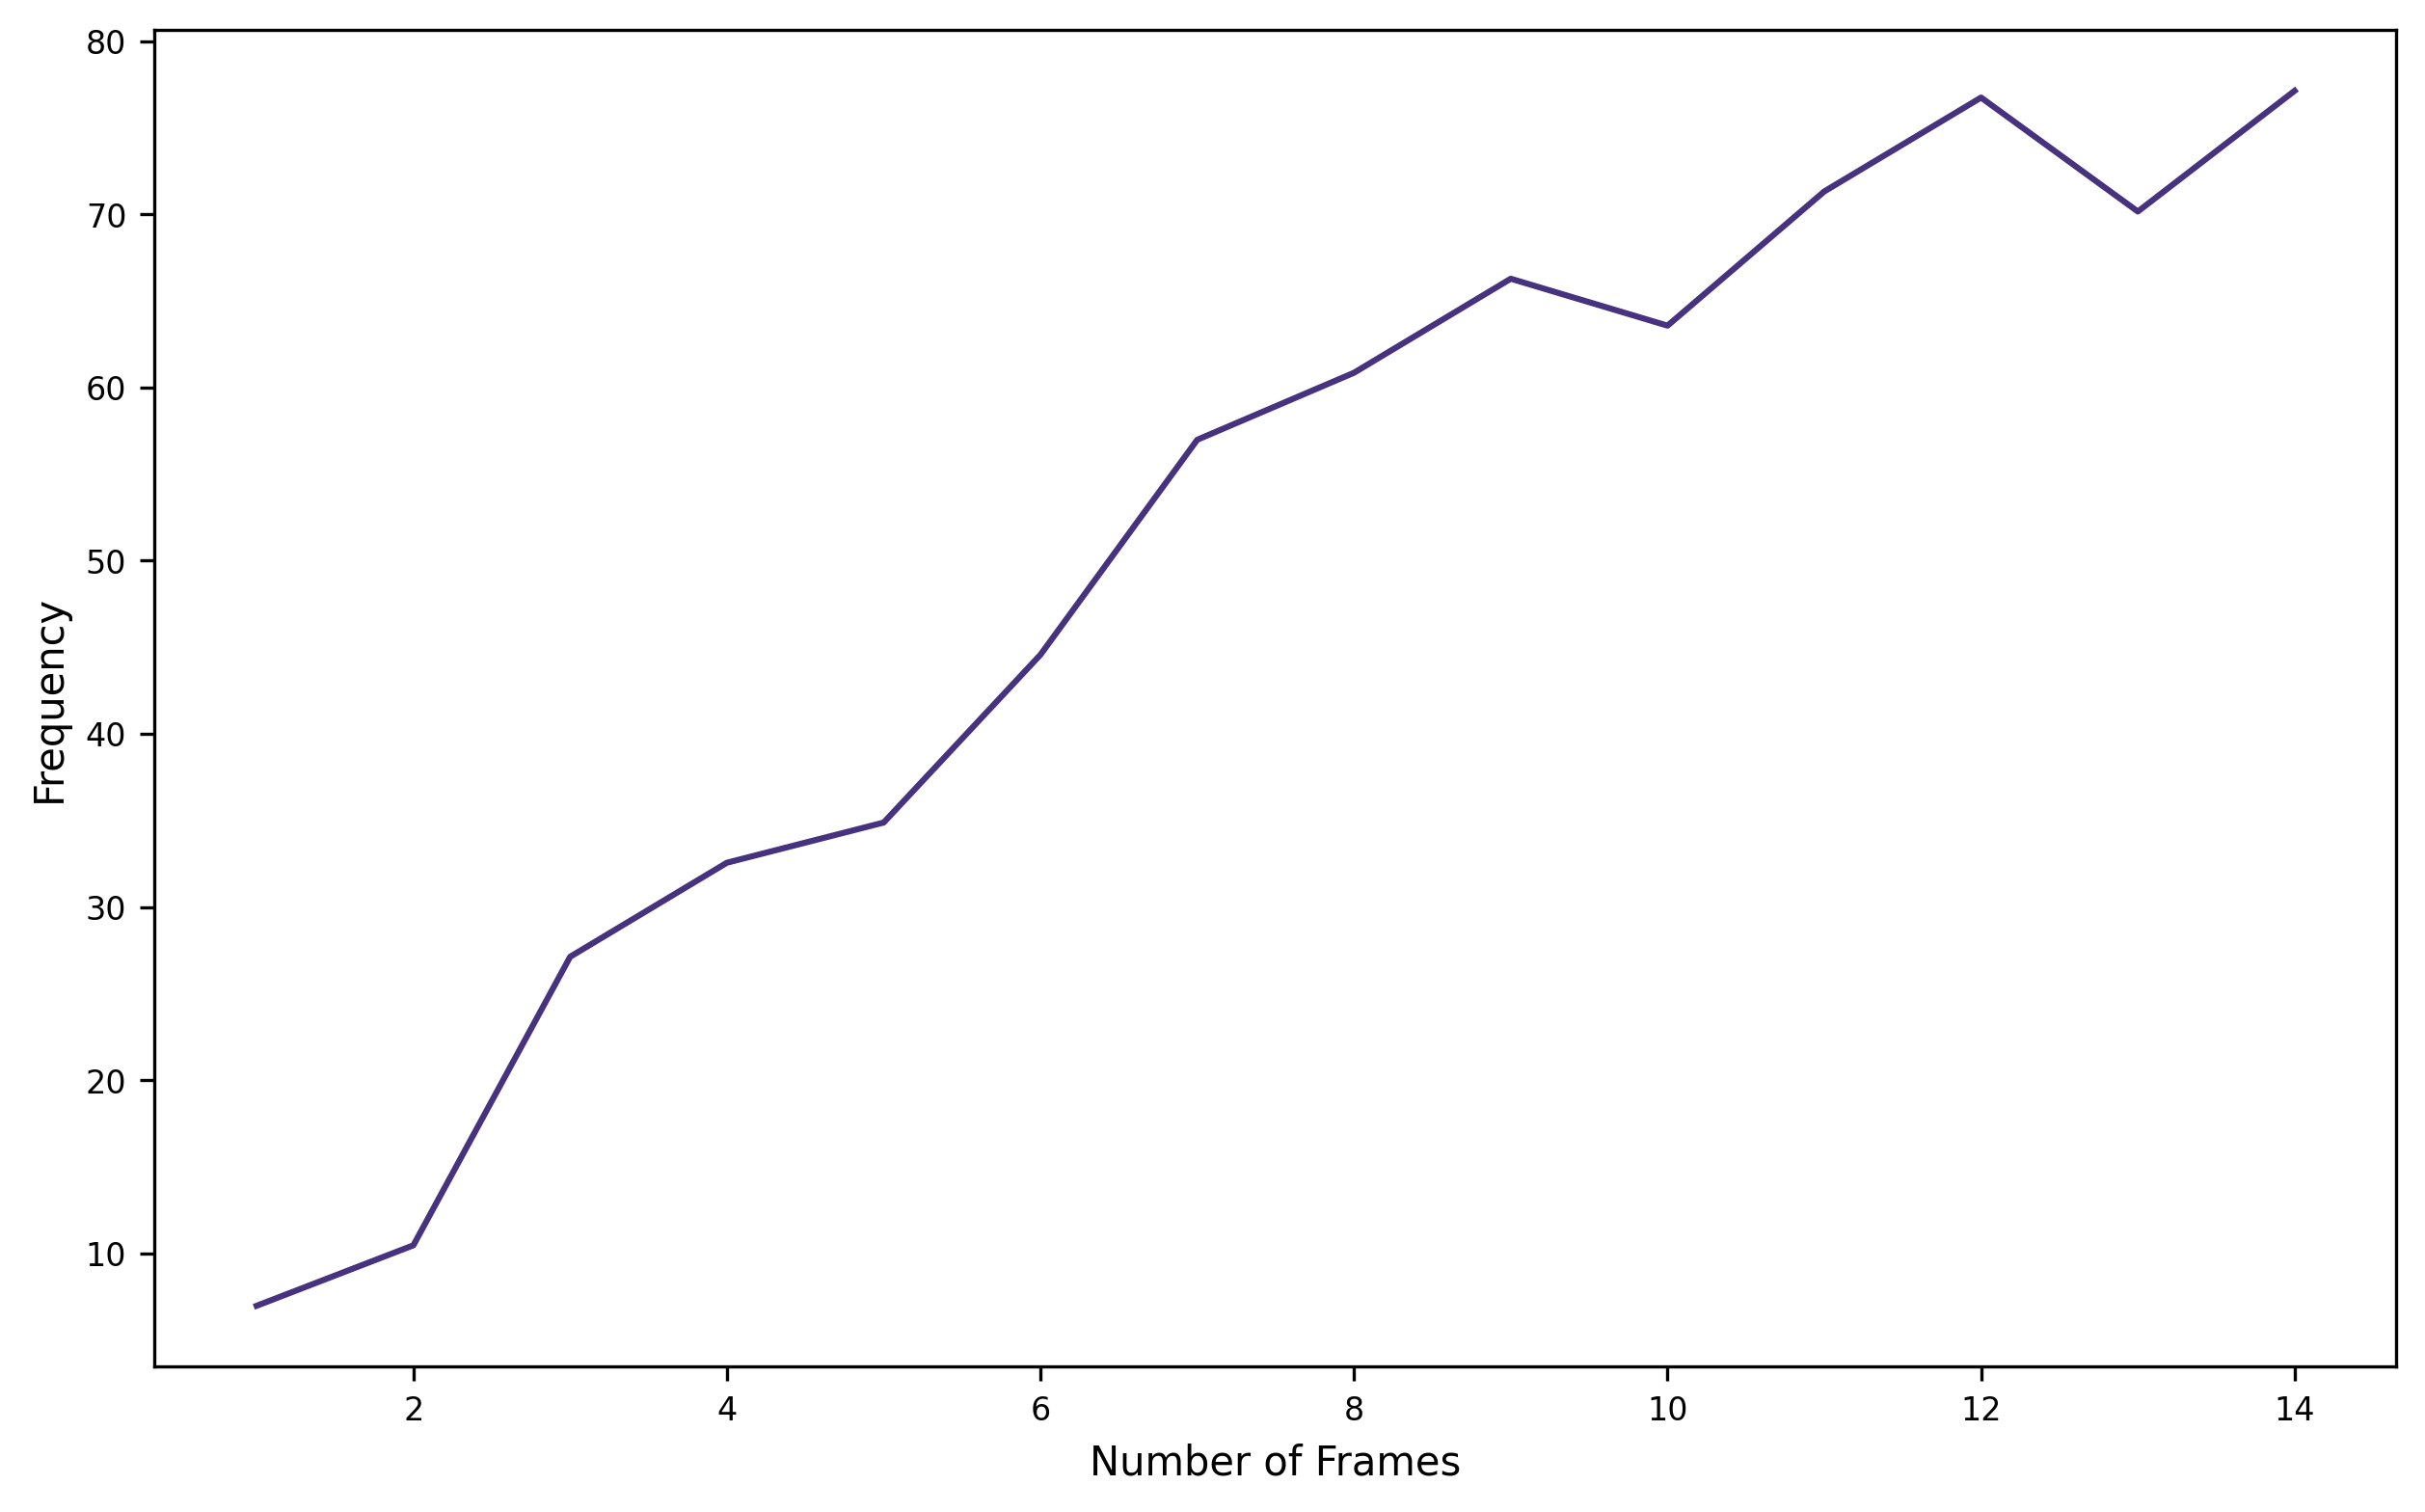

In [93]:
# Plot the number of frames against the frequency
plt.figure(figsize=(10,6), dpi=300)
sns.set_palette('viridis')
g = sns.lineplot(x='Samples per class', y='Top-1 Accuracy', data=csn)
# plt.xticks(rotation=90)
plt.xlabel('Number of Frames', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
# g.set(xticklabels=[])  
g.tick_params(bottom=True)  # remove the ticks
g.tick_params(axis='y', labelsize=8)
g.tick_params(axis='x', labelsize=8)

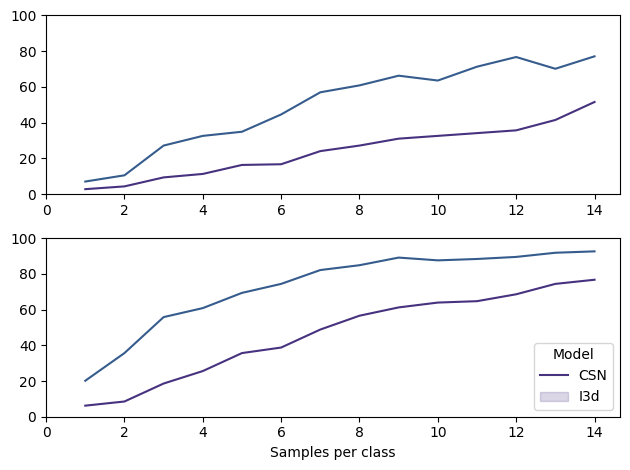

In [151]:
fig, axs = plt.subplots(2, 1)

sns.lineplot(x='Samples per class', y='Top-1 Accuracy', data=i3d, ax=axs[0])

axs[0].set(ylim=(0, 100))
axs[0].set(xticks=range(0,16,2))
# axs[0].tick_params(bottom=False)
axs[0].set(xlabel='')


sns.lineplot(x='Samples per class', y='Top-5 Accuracy', data=i3d, ax=axs[1])
axs[1].set(xticks=range(0,16,2))
axs[1].set(ylim=(0, 100))
plt.legend(title='Model', loc='lower right', labels=['CSN','I3d'])

sns.lineplot(x='Samples per class', y='Top-1 Accuracy', data=csn, ax=axs[0])

axs[0].set(ylim=(0, 100))
axs[0].set(xticks=range(0,16,2))
# axs[0].tick_params(bottom=False)
axs[0].set(xlabel='')
axs[0].set(ylabel='')

sns.lineplot(x='Samples per class', y='Top-5 Accuracy', data=csn, ax=axs[1])
axs[1].set(xticks=range(0,16,2))
axs[1].set(ylabel='')
axs[1].set(ylim=(0, 100))
# plt.legend(title='Model', loc='lower right', labels=['I3D'])

fig.tight_layout()